In [1]:
# from pyGSI.diags import Conventional
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from plots import base_plots, wind_base_plots

In [2]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Filter dataframe returned by PyGSI

One big question with this is to use PyGSI or just to borrow some of the code and have with package not rely on PyGSI at all?

## Read diag files

In [3]:
#temperature diag files
diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

#wind diag files
diag_uv_ges_fp = '../example_data/diag_conv_uv_ges.2024031812.nc4'
diag_uv_anl_fp = '../example_data/diag_conv_uv_anl.2024031812.nc4'

In [14]:
diag_ges = Conventional(diag_uv_ges_fp)
diag_anl = Conventional(diag_uv_anl_fp)

In [16]:
diag_anl.metadata

{'Obs Type': 'conv',
 'Variable': 'uv',
 'Date': datetime.datetime(2024, 3, 18, 12, 0),
 'File Type': 'anl',
 'Diag File Type': 'conventional'}

## Query data

In [17]:
df_ges = diag_ges.get_data()
df_anl = diag_anl.get_data()

In [18]:
df_anl

,station_id,observation_class,observation_type,observation_subtype,latitude,longitude,station_elevation,pressure,height,time,prep_qc_mark,setup_qc_mark,nonlinear_qc_var_jb,prep_use_flag,analysis_use_flag,nonlinear_qc_rel_wgt,errinv_input,errinv_adjust,errinv_final,wind_reduction_factor_at_10m,u_observation,u_omf_adjusted,u_omf_unadjusted,v_observation,v_omf_adjusted,v_omf_unadjusted,dominant_sfc_type,model_terrain,u_hofx_unadjusted,u_hofx_adjusted,v_hofx_unadjusted,v_hofx_adjusted
0,IR272,uv,245,0,5.685080,202.797836,110092.0,894.200012,68.0,-1.00000,2.0,1.000000e+09,0.0,0.0,1.0,4.0,0.526316,0.526316,5.263158e-01,1.0,-8.950697,-1.464624,-1.464624,0.940756,2.020810,2.020810,0.0,0.0,-7.486073,-7.486073,-1.080054,-1.080054
1,IR272,uv,245,0,6.128040,202.857498,110059.0,900.799988,59.0,-1.00000,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,2.938736e-39,1.0,-9.521784,-2.333984,-2.333984,1.850847,3.969705,3.969705,0.0,0.0,-7.187799,-7.187799,-2.118857,-2.118857
2,IR272,uv,245,0,6.071170,203.080261,110052.0,930.799988,56.0,-1.00000,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,2.938736e-39,1.0,-8.705514,-1.873541,-1.873541,1.850414,5.598646,5.598646,0.0,0.0,-6.831973,-6.831973,-3.748232,-3.748232
3,IR272,uv,245,0,6.347840,203.166962,110077.0,827.799988,69.0,-1.00000,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,5.263158e-01,1.0,-6.066584,-0.464204,-0.464204,-0.637624,-1.757761,-1.757761,0.0,0.0,-5.602379,-5.602379,1.120137,1.120137
4,IR272,uv,245,0,6.107880,203.118515,110057.0,933.700012,49.0,-1.00000,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,2.938736e-39,1.0,-4.885854,1.953704,1.953704,2.935717,6.706806,6.706806,0.0,0.0,-6.839558,-6.839558,-3.771089,-3.771089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130421,C3583,uv,288,0,43.470501,356.220490,14.0,1017.064636,24.0,-0.03333,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000,1.000000,2.938736e-39,1.0,-3.700000,-5.811331,-5.811331,-2.600000,3.054633,3.054633,0.0,0.0,2.111331,2.111331,-5.654633,-5.654633
130422,D9120,uv,288,0,43.477329,352.668671,50.0,1017.361877,60.0,-0.25000,2.0,1.000000e+09,0.0,115.0,0.0,4.0,1.000000,1.000000,8.000000e-01,1.0,0.000000,-1.298574,-1.298574,0.000000,1.891883,1.891883,0.0,0.0,1.298574,1.298574,-1.891883,-1.891883
130423,AS353,uv,288,0,43.537998,354.376160,17.0,1017.065002,27.0,-0.25000,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000,1.000000,9.216590e-01,1.0,-1.800000,-0.240677,-0.240677,-2.000000,0.305622,0.305622,0.0,0.0,-1.559323,-1.559323,-2.305622,-2.305622
130424,AS353,uv,288,0,43.537998,354.376160,17.0,1017.065002,27.0,-0.08333,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000,1.000000,9.216590e-01,1.0,-2.100000,-0.540677,-0.540677,-2.300000,0.005622,0.005622,0.0,0.0,-1.559323,-1.559323,-2.305622,-2.305622


In [19]:
# for col in df_anl.columns:
#     # Check if all elements in the column are equal between _anl and _ges
#     if not (df_anl[col] == df_ges[col]).all():
#         print(f"Column '{col}' is different.")

## Testing PyGSI filter_obs function

### Set filter arguments

In [20]:
hem = "CONUS"

obs_types = [120]
elv_range = (0,20)

# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (360-109, 360-102) #to convert from deg west to deg east

In [21]:
df_anl_fil = filter_df(df_anl, lat_range=co_lats, lon_range=co_lons)
df_ges_fil = filter_df(df_ges, lat_range=co_lats, lon_range=co_lons)
print(len(df_anl_fil))
print(len(df_ges_fil))

2171
2171


In [22]:
df_anl_fil

,station_id,observation_class,observation_type,observation_subtype,latitude,longitude,station_elevation,pressure,height,time,prep_qc_mark,setup_qc_mark,nonlinear_qc_var_jb,prep_use_flag,analysis_use_flag,nonlinear_qc_rel_wgt,errinv_input,errinv_adjust,errinv_final,wind_reduction_factor_at_10m,u_observation,u_omf_adjusted,u_omf_unadjusted,v_observation,v_omf_adjusted,v_omf_unadjusted,dominant_sfc_type,model_terrain,u_hofx_unadjusted,u_hofx_adjusted,v_hofx_unadjusted,v_hofx_adjusted
47052,72476,uv,220,0,39.106312,251.438721,1474.0,514.500000,5.486000e+03,-0.75711,2.0,1.000000e+09,0.0,0.0,1.0,4.0,0.403075,0.325913,0.325913,1.0,-13.7,-0.903998,-0.903998,-2.4,2.354700,2.354700,1.0,1424.532716,-12.796002,-12.796002,-4.754700,-4.754700
47053,72476,uv,220,0,39.105042,251.432739,1474.0,502.000000,1.000000e+11,-0.74687,2.0,1.000000e+09,0.0,0.0,1.0,4.0,0.400352,0.295916,0.295916,1.0,-14.5,-0.805692,-0.805692,-5.3,-0.165327,-0.165327,1.0,1421.268173,-13.694307,-13.694307,-5.134673,-5.134673
47054,72476,uv,220,0,39.104759,251.431763,1474.0,500.000000,1.000000e+11,-0.74522,2.0,1.000000e+09,0.0,0.0,1.0,4.0,0.399920,0.220922,0.220922,1.0,-14.5,-0.692365,-0.692365,-5.3,-0.107278,-0.107278,1.0,1420.681486,-13.807634,-13.807634,-5.192722,-5.192722
47055,72476,uv,220,0,39.103889,251.428711,1474.0,493.899994,5.791000e+03,-0.74017,2.0,1.000000e+09,0.0,0.0,1.0,4.0,0.398603,0.340516,0.340516,1.0,-14.5,-0.341648,-0.341648,-5.3,0.070572,0.070572,1.0,1419.774642,-14.158352,-14.158352,-5.370572,-5.370572
47056,72476,uv,220,0,39.101620,251.420654,1474.0,479.000000,1.000000e+11,-0.72751,2.0,1.000000e+09,0.0,0.0,1.0,4.0,0.395424,0.327517,0.327517,1.0,-16.0,-1.023370,-1.023370,-5.8,0.095108,0.095108,1.0,1421.154000,-14.976630,-14.976630,-5.895109,-5.895109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59034,LGMNT,uv,288,0,40.185799,254.851700,1564.0,849.046936,1.574000e+03,-0.10000,2.0,1.000000e+09,0.0,115.0,0.0,4.0,1.000000,1.000000,0.937062,1.0,0.0,-0.796306,-0.796306,0.0,-0.335504,-0.335504,1.0,1550.567008,0.796306,0.796306,0.335504,0.335504
59035,LGMNT,uv,288,0,40.185799,254.851700,1564.0,849.046936,1.574000e+03,-0.01667,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000,1.000000,0.937062,1.0,-0.6,-1.396306,-1.396306,-0.6,-0.935504,-0.935504,1.0,1550.567008,0.796306,0.796306,0.335504,0.335504
59036,LGMNT,uv,288,0,40.185799,254.851700,1564.0,849.046936,1.574000e+03,0.06667,2.0,1.000000e+09,0.0,115.0,0.0,4.0,1.000000,1.000000,0.937062,1.0,0.0,-0.796306,-0.796306,0.0,-0.335504,-0.335504,1.0,1550.567008,0.796306,0.796306,0.335504,0.335504
59037,LGMNT,uv,288,0,40.185799,254.851700,1564.0,849.046936,1.574000e+03,0.15000,2.0,1.000000e+09,0.0,115.0,0.0,4.0,1.000000,1.000000,0.937062,1.0,0.0,-0.796306,-0.796306,0.0,-0.335504,-0.335504,1.0,1550.567008,0.796306,0.796306,0.335504,0.335504


## Testing base plots

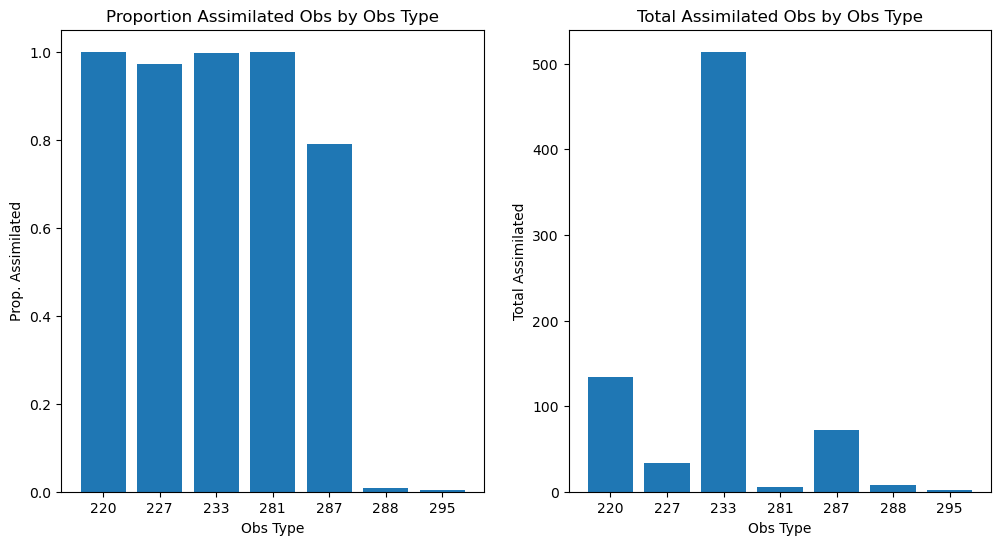

U Observation Histogram Statistics: 
n: 2171, mean: -0.8487792611122131, std: 4.943521976470947, max: 9.800000190734863, min: -28.5

U OmF Histogram Statistics: 
n: 2171, mean: -0.3266655504703522, std: 1.7250345945358276, max: 6.314773082733154, min: -24.311264038085938

U OmA Histogram Statistics: 
n: 2171, mean: -0.4441898763179779, std: 1.7001478672027588, max: 6.498080253601074, min: -23.55390167236328

V Observation Histogram Statistics: 
n: 2171, mean: -2.8496546745300293, std: 6.095005512237549, max: 16.700000762939453, min: -33.0

V OmF Histogram Statistics: 
n: 2171, mean: -0.3266655504703522, std: 1.7250345945358276, max: 6.314773082733154, min: -24.311264038085938

U OmA Histogram Statistics: 
n: 2171, mean: -0.4441898763179779, std: 1.7001478672027588, max: 6.498080253601074, min: -23.55390167236328



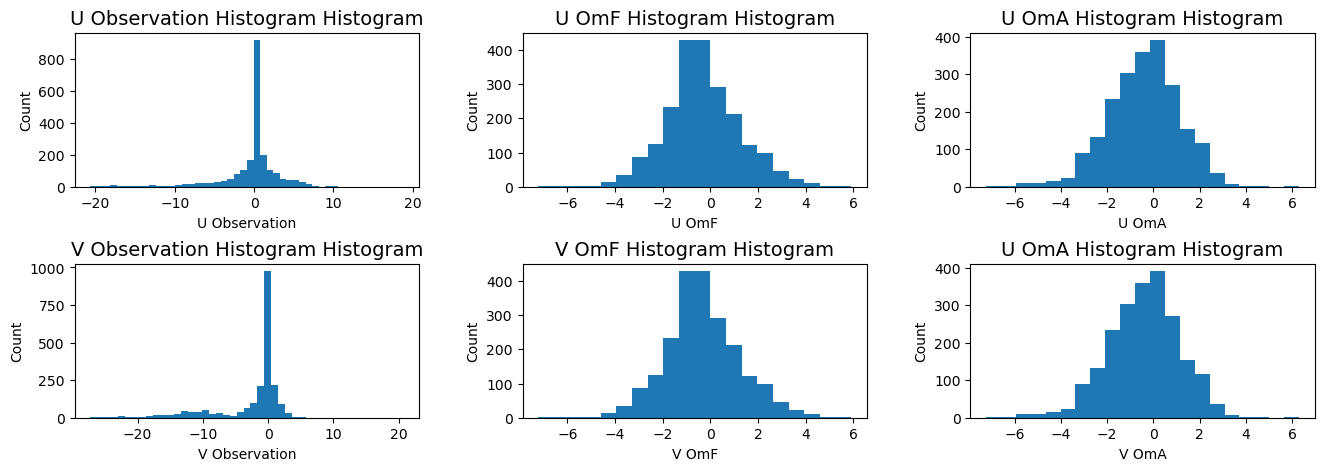

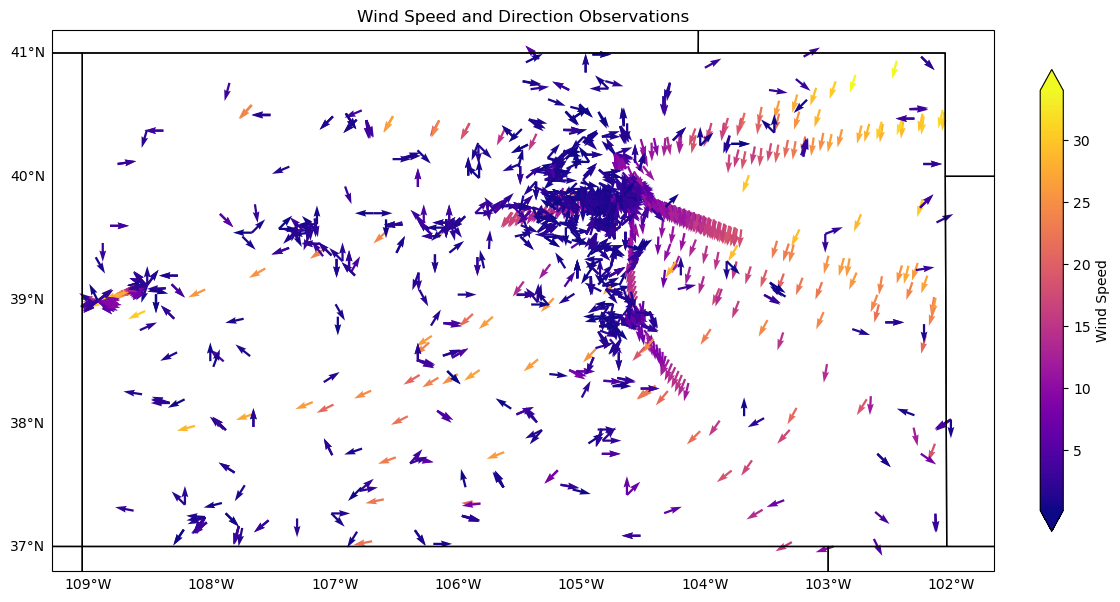

In [23]:
# base_plots(df_anl_fil, df_ges_fil, diag_ges.metadata)
wind_base_plots(df_anl_fil, df_ges_fil, diag_ges.metadata)